In [1]:
#Importing all reqiured libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import average_precision_score
from random import seed,sample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score, roc_curve, auc, precision_score

In [2]:
data = pd.read_csv('C:/Users/ameya/OneDrive/Documents/DataFile.csv')
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


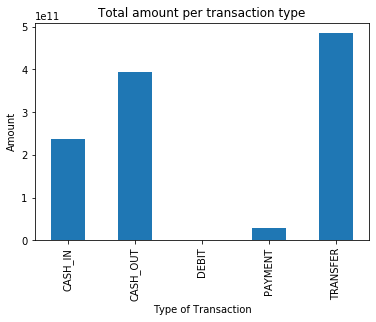

In [3]:
var = data.groupby('type').amount.sum()
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
var.plot(kind='bar')
ax1.set_title("Total amount per transaction type")
ax1.set_xlabel('Type of Transaction')
ax1.set_ylabel('Amount');

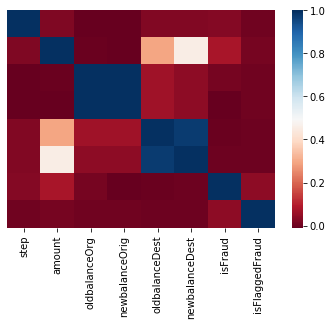

In [4]:
sns.heatmap(data.corr(),yticklabels = False,cmap='RdBu');

In [5]:
'''
As we know there are some data which is in string format so now we will convert that string data into integer. So after doing
that we will have all our data in integer format which is easy for us to apply ML algorithms on it. 
'''
#Data Cleaning
data = data.replace(to_replace={'PAYMENT':1,'TRANSFER':2,'CASH_OUT':3,'CASH_IN':4,'DEBIT':5,'No':0,'Yes':1})
data.drop(['nameOrig','nameDest','isFlaggedFraud'],axis=1,inplace=True)
data.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,1,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,1,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,2,181.00,181.0,0.00,0.0,0.0,1
3,1,3,181.00,181.0,0.00,21182.0,0.0,1
4,1,1,11668.14,41554.0,29885.86,0.0,0.0,0


In [6]:
#ML Module
X = data.drop(['isFraud'],axis=1)
y = data[['isFraud']]

In [7]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.2, random_state = 121)

In [8]:
clf = RandomForestClassifier(n_estimators=15)

In [9]:
if True:
    probabilities = clf.fit(train_X, train_y.values.ravel()).predict(test_X)

In [10]:
if True:
    print(average_precision_score(test_y,probabilities))

0.7677445705701614


In [11]:
#Random Forest - 

RandomState = 42
seed(21)
X = data.drop("isFraud",1)
y = data.isFraud
X_train, X_test, y_train, y_test = train_test_split(X, y)
    
# Normalizing data
scaler = StandardScaler()
scaler.fit(X_train)

# Apply Transformation
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
parametersRF = {'n_estimators':15,'oob_score':True,'class_weight': "balanced",'n_jobs':-1, 'random_state':RandomState}
RF = RandomForestClassifier(**parametersRF)
fitted_vals = RF.fit(X_train, y_train)

predictionsRF = RF.predict(X_test)
      
CM_RF = confusion_matrix(y_test,predictionsRF)
CR_RF = classification_report(y_test,predictionsRF)
fprRF, recallRF, thresholdsRF = roc_curve(y_test, predictionsRF)
AUC_RF = auc(fprRF, recallRF)
results = {"Matrix":CM_RF,"Details":CR_RF,"Area":AUC_RF}

C:\Users\ameya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\ameya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


In [13]:
for score in results:
    print(score,": \n",results[score])

Confusion Matrix : 
 [[1588519      43]
 [    447    1646]]
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1588562
           1       0.97      0.79      0.87      2093

    accuracy                           1.00   1590655
   macro avg       0.99      0.89      0.94   1590655
weighted avg       1.00      1.00      1.00   1590655

Area Under Curve : 
 0.8932019459190109
